In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df = pd.read_excel("dataset.xlsx",sheet_name=0)
df.head()

,ID,Text,User_Name,subtask_a,subtask_b
0,1304930000000000000,even if you are ensconced in a pandemic pod wi...,"J. Rodríguez, Ph.D.💥👀",CORO,COEM
1,1303730000000000000,donald trump sacrificed thousands of americans...,jhon ciabattari,CORO,COEM
2,1303640000000000000,new coronavirus anger in china as doctor who d...,Shaun Dakin #ClimateAction,CORO,COEM
3,1303220000000000000,is he joking birmingham stabbings violent out...,Billy #Boom Kane,CORO,COEM
4,1303070000000000000,as soon as i saw this headline straight away i...,Mr Jambon Fumé,CORO,COEM


In [3]:
df.describe()

,ID
count,7.164100e+04
mean,1.304640e+18
std,9.292882e+14
min,1.302680e+18
25%,1.303910e+18
50%,1.304410e+18
75%,1.305410e+18
max,1.306910e+18


In [4]:
df['subtask_a'].value_counts()

subtask_a
CORO    47156
NOCO    24485
Name: count, dtype: int64

In [5]:
df['subtask_b'].value_counts()

subtask_b
CONE    24624
COEM    22532
NONE    14778
NOEM     9707
Name: count, dtype: int64

In [6]:
label_mapping = {
    'CONE': 0,  # Corona-related Non-Emotional
    'COEM': 1,  # Corona-related Emotional
    'NONE': 2,  # Non-Corona Non-Emotional
    'NOEM': 3   # Non-Corona Emotional
}

df['task_b'] = df['subtask_b'].map(label_mapping)

df.head()


,ID,Text,User_Name,subtask_a,subtask_b,task_b
0,1304930000000000000,even if you are ensconced in a pandemic pod wi...,"J. Rodríguez, Ph.D.💥👀",CORO,COEM,1
1,1303730000000000000,donald trump sacrificed thousands of americans...,jhon ciabattari,CORO,COEM,1
2,1303640000000000000,new coronavirus anger in china as doctor who d...,Shaun Dakin #ClimateAction,CORO,COEM,1
3,1303220000000000000,is he joking birmingham stabbings violent out...,Billy #Boom Kane,CORO,COEM,1
4,1303070000000000000,as soon as i saw this headline straight away i...,Mr Jambon Fumé,CORO,COEM,1


In [7]:
df['Words Per Tweet'] = df['Text'].str.split().apply(len)
df.head()

,ID,Text,User_Name,subtask_a,subtask_b,task_b,Words Per Tweet
0,1304930000000000000,even if you are ensconced in a pandemic pod wi...,"J. Rodríguez, Ph.D.💥👀",CORO,COEM,1,35
1,1303730000000000000,donald trump sacrificed thousands of americans...,jhon ciabattari,CORO,COEM,1,38
2,1303640000000000000,new coronavirus anger in china as doctor who d...,Shaun Dakin #ClimateAction,CORO,COEM,1,15
3,1303220000000000000,is he joking birmingham stabbings violent out...,Billy #Boom Kane,CORO,COEM,1,14
4,1303070000000000000,as soon as i saw this headline straight away i...,Mr Jambon Fumé,CORO,COEM,1,36


<Axes: title={'center': 'Words Per Tweet'}, xlabel='subtask_a'>

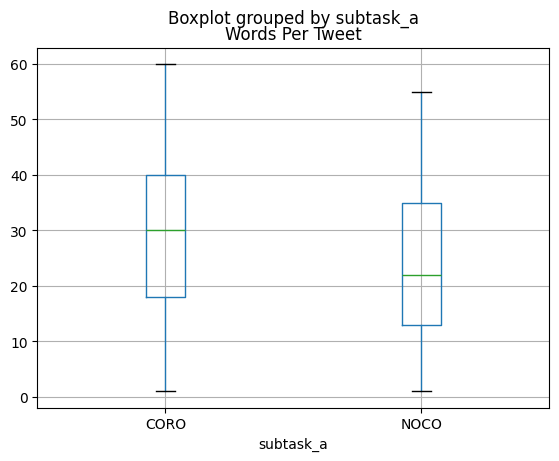

In [8]:
df.boxplot("Words Per Tweet", by='subtask_a')

In [9]:
df['task_a'] = df['subtask_a'].apply(lambda x: 1 if x == 'CORO' else 0)

In [10]:
df.head()

,ID,Text,User_Name,subtask_a,subtask_b,task_b,Words Per Tweet,task_a
0,1304930000000000000,even if you are ensconced in a pandemic pod wi...,"J. Rodríguez, Ph.D.💥👀",CORO,COEM,1,35,1
1,1303730000000000000,donald trump sacrificed thousands of americans...,jhon ciabattari,CORO,COEM,1,38,1
2,1303640000000000000,new coronavirus anger in china as doctor who d...,Shaun Dakin #ClimateAction,CORO,COEM,1,15,1
3,1303220000000000000,is he joking birmingham stabbings violent out...,Billy #Boom Kane,CORO,COEM,1,14,1
4,1303070000000000000,as soon as i saw this headline straight away i...,Mr Jambon Fumé,CORO,COEM,1,36,1


In [11]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['subtask_b','subtask_a','task_b']) 
y = df['task_a'] 

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")


Train: 50148, Validation: 10746, Test: 10747


In [18]:
X_train.head()

,ID,Text,User_Name,Words Per Tweet,task_a
34826,1305320000000000000,we extend our sincere apologies to the people ...,Phil Mutwol,37,1
28513,1303880000000000000,lies fauci said dont worry on feb 29,The GOAT,8,0
67316,1304830000000000000,it was time to start looking at the best teach...,thibaud,41,1
70592,1305770000000000000,i wonder when coronavirus will end,Sa kat,6,1
27291,1303740000000000000,189972 dead and he didnt want to create a pani...,David Kaplan,33,0


In [20]:
X_train.head()

,ID,Text,User_Name,Words Per Tweet,task_a
34826,1305320000000000000,we extend our sincere apologies to the people ...,Phil Mutwol,37,1
28513,1303880000000000000,lies fauci said dont worry on feb 29,The GOAT,8,0
67316,1304830000000000000,it was time to start looking at the best teach...,thibaud,41,1
70592,1305770000000000000,i wonder when coronavirus will end,Sa kat,6,1
27291,1303740000000000000,189972 dead and he didnt want to create a pani...,David Kaplan,33,0


In [ ]:
def tokenize(batch):
    return tokenizer(batch, padding=True, truncation=True)

print(tokenize(X_train['Text'][:5].tolist()))


{'input_ids': [[101, 2057, 7949, 2256, 18006, 25380, 2000, 1996, 2111, 1997, 11959, 1998, 3653, 2015, 2005, 4214, 2035, 11901, 1997, 17183, 11219, 2075, 2616, 2875, 8304, 1997, 21887, 23350, 29337, 14831, 5541, 2135, 2004, 10089, 7959, 15728, 5897, 13320, 18447, 2100, 23713, 6634, 2001, 4440, 4691, 1999, 2256, 2406, 3207, 7959, 5844, 16924, 23713, 4167, 28556, 2075, 102], [101, 3658, 6904, 14194, 2072, 2056, 2123, 2102, 4737, 2006, 13114, 2756, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2009, 2001, 2051, 2000, 2707, 2559, 2012, 1996, 2190, 5089, 2040, 2064, 2191, 2149, 2293, 2151, 3395, 2009, 2165, 1996, 2236, 12554, 1997, 1996, 21887, 23350, 2000, 2298, 3458, 2256, 12847, 2140, 2000, 3059, 5089, 1998, 2493, 1999, 2465, 2007, 3486, 1998, 15806, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 4687, 2043, 21887, 23350, 2097, 2203, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,